In [1]:
import gymnasium as gym
import matplotlib.pyplot as plt
import numpy as np
import time
from robot_descriptions.loaders.pybullet import load_robot_description
import pybullet

In [3]:
pybullet.connect(pybullet.GUI)
name = 'ur5_description'
robot = load_robot_description(name)
pybullet.setGravity(0,0,-9.8)

In [5]:
nq = pybullet.getNumJoints(robot)

for joint in range(nq):
    info = pybullet.getJointInfo(robot, joint)
    print(info)

(0, b'world_joint', 4, -1, -1, 0, 0.0, 0.0, 0.0, -1.0, 0.0, 0.0, b'base_link', (0.0, 0.0, 0.0), (0.0, 0.0, 0.0), (0.0, 0.0, 0.0, 1.0), -1)
(1, b'shoulder_pan_joint', 0, 7, 6, 1, 0.0, 0.0, -6.28318530718, 6.28318530718, 150.0, 3.15, b'shoulder_link', (0.0, 0.0, 1.0), (0.0, 0.0, 0.089159), (0.0, 0.0, 0.0, 1.0), 0)
(2, b'shoulder_lift_joint', 0, 8, 7, 1, 0.0, 0.0, -6.28318530718, 6.28318530718, 150.0, 3.15, b'upper_arm_link', (0.0, 1.0, 0.0), (0.0, 0.13585, 0.0), (0.0, -0.7071067811848163, 0.0, 0.7071067811882787), 1)
(3, b'elbow_joint', 0, 9, 8, 1, 0.0, 0.0, -3.14159265359, 3.14159265359, 150.0, 3.15, b'forearm_link', (0.0, 1.0, 0.0), (0.0, -0.1197, 0.14499999999999996), (0.0, 0.0, 0.0, 1.0), 2)
(4, b'wrist_1_joint', 0, 10, 9, 1, 0.0, 0.0, -6.28318530718, 6.28318530718, 28.0, 3.2, b'wrist_1_link', (0.0, 1.0, 0.0), (0.0, 0.0, 0.14225), (0.0, -0.7071067811848163, 0.0, 0.7071067811882787), 3)
(5, b'wrist_2_joint', 0, 11, 10, 1, 0.0, 0.0, -6.28318530718, 6.28318530718, 28.0, 3.2, b'wrist_2_l

In [23]:
pybullet.disconnect()

### Structured Code

In [25]:
from observation import Actor
actor = Actor()

In [34]:
pybullet.connect(pybullet.GUI)
name = 'ur5_description'
robot = load_robot_description(name)

timeStep = 1./300
pybullet.setTimeStep(timeStep)

In [35]:
pybullet.setGravity(0, 0, -9.8)

In [36]:
for j in actor.free_joints:  # range (pybullet.getNumJoints(robot)):
    pybullet.setJointMotorControl2(
        robot, j, pybullet.VELOCITY_CONTROL, force=0)
pybullet.setJointMotorControl2(
    robot, 6, pybullet.VELOCITY_CONTROL, force=0)

pos, quat = actor.get_ee_pose(robot)

for i in range(100):
    actor.set_jpos(actor.INITIAL_CONF, robot, timeStep)

timeStep = 1./3000
pybullet.setTimeStep(timeStep)
episode, ee_positions_x, ee_positions_y, ee_positions_z = actor.rollout_from_env(
    robot, actor.pid_policy, timeStep)

In [37]:
pybullet.disconnect()

[]

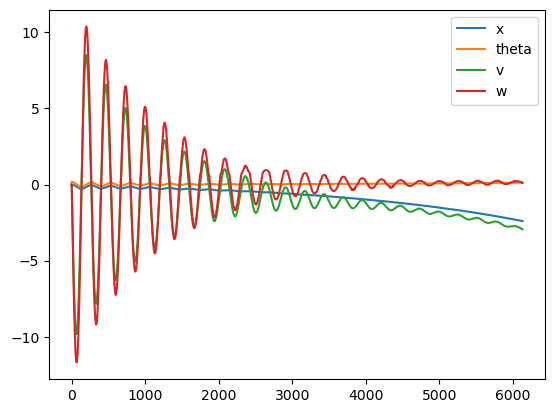

In [38]:
plt.plot(np.array(episode['observation'])[:, 0], label='x')
plt.plot(np.array(episode['observation'])[:, 1], label='theta')
plt.plot(np.array(episode['observation'])[:, 2], label='v')
plt.plot(np.array(episode['observation'])[:, 3], label='w')
plt.legend()
plt.savefig('obs.png')
plt.plot()

[]

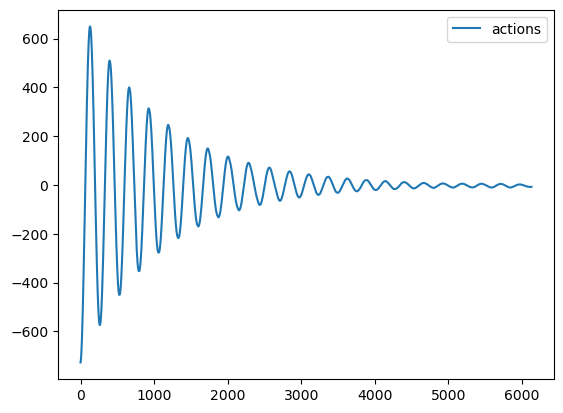

In [39]:
plt.plot(episode['action'], label='actions')
plt.legend()
plt.savefig('actions.png')
plt.plot()

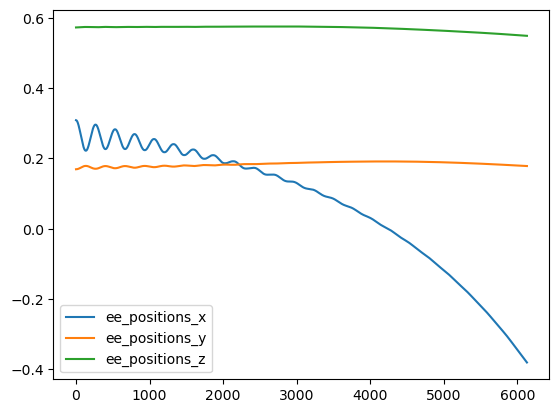

In [40]:
plt.plot(ee_positions_x, label='ee_positions_x')
plt.plot(ee_positions_y, label='ee_positions_y')
plt.plot(ee_positions_z, label='ee_positions_z')
plt.legend()
plt.plot()
plt.savefig('EE_positions.png')